# eSCORE, a scoring function for RNA structure prediction #

With barnaba it is possible to score decoys according to the eSCORE function. Essentially, we train a simple statistical potential using the interactions observed in a reference structure, as described in example 2. 
The distribution from the crystal structure of the large ribosomal subunit is then used to assign a score to each decoy in a long MD trajectory of a tetraloop.

We show below how to *train* the model:

In [1]:
from barnaba import escore
pdb = "../test/data/1S72.pdb"
Escore = escore.Escore([pdb])

# KDE computed. Bandwidth=  0.25  using 10655 base-pairs

And how to score samples from a trajectory

In [2]:

traj = "../test/data/UUCG.xtc"
top = "../test/data/UUCG.pdb"
scores = Escore.score(traj,topology=top)

# Loaded sample ../test/data/UUCG.xtc 


We visualize the data by plotting the score versus the eRMSD from native

# Loaded reference uucg2.pdb 
# Loaded target ../test/data/UUCG.xtc 


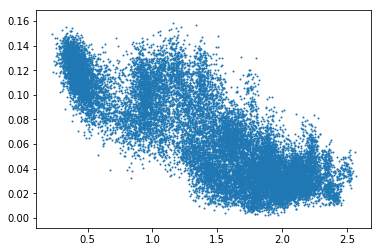

In [14]:
import barnaba as bb
import matplotlib.pyplot as plt
native="uucg2.pdb"
ermsd = bb.ermsd(native,traj,topology=top)

plt.scatter(ermsd,scores,s=1)
plt.show()


We can see that some high-scoring decoys have a large eRMSD from native:

In [13]:
import numpy as np
print "#%8s   %6s %6s"  % ("Index","eSCORE","eRMSD")
for j in np.argsort(scores)[:-5:-1]:
    print " %8d   %6.4f %6.4f" % (j,scores[j],ermsd[j])
    

#   Index   eSCORE  eRMSD
     3849   0.1583 1.1591
    19518   0.1567 1.3370
    16169   0.1551 1.2246
    18536   0.1548 0.3352


We now pick two structure for comparison

In [6]:
import mdtraj as md

# load trajectory
tt = md.load(traj,top=top)
# save low ermsd 
tt[3849].save("best_score_0.pdb")
tt[18536].save("best_score_1.pdb")

# align to native and write aligned PDB to disk
rmsd1 = bb.rmsd(native,'best_score_0.pdb',out='best_score_0a.pdb')
rmsd2 = bb.rmsd(native,'best_score_1.pdb',out='best_score_1a.pdb')
print rmsd1, rmsd2

# found  93 atoms in common
# found  93 atoms in common
[0.22360237] [0.11369839]


In [9]:
import py3Dmol

pdb_e = open('best_score_0a.pdb','r').read()
pdb_n = open('best_score_1a.pdb','r').read()

p = py3Dmol.view(width=900,height=600,viewergrid=(1,2))
p.addModel(pdb_n,'pdb',viewer=(0,0))
p.addModel(pdb_e,'pdb',viewer=(0,1))

p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
